#lstm

In [161]:
import yfinance as yf
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd

def download_and_prepare_data(tickers, start_date, end_date):
    """Downloads data for multiple stocks and prepares it for prediction."""
    data = {}
    for ticker in tickers:
        data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
        data[ticker] = data[ticker].pct_change(1).dropna().values.reshape(-1, 1)
    return data

def create_models(data, look_back, split_percent=0.8):
    """Creates and trains an LSTM model for each stock."""
    models = {}
    for ticker, values in data.items():
        split = int(split_percent * len(values))
        close_train = values[:split]
        close_test = values[split:]

        train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)
        test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

        model = Sequential()
        model.add(LSTM(10, activation='relu', input_shape=(look_back, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit_generator(train_generator, epochs=25, verbose=1)

        models[ticker] = model
    return models

def predict_for_stocks(models, num_prediction, tickers):
    """Predicts future values for multiple stocks."""
    predictions = {}
    for ticker, model in models.items():
        values = data[ticker]
        prediction_list = values[-look_back:]

        for _ in range(num_prediction):
            x = prediction_list[-look_back:]
            x = x.reshape((1, look_back, 1))
            out = model.predict(x)[0][0]
            prediction_list = np.append(prediction_list, out)
        predictions[ticker] = prediction_list[look_back-1:]
    return predictions

def predict_dates(num_prediction, last_date):
    """Generates prediction dates based on the last date in the data."""
    return pd.date_range(last_date, periods=num_prediction+1).tolist()

# Example usage
tickers = ['aapl', 'msft', 'goog','tsla','amd']
start_date = "2018-01-01"
end_date = "2023-11-08"
look_back = 15
num_prediction = 0

data = download_and_prepare_data(tickers, start_date, end_date)
models = create_models(data, look_back)
predictions = predict_for_stocks(models, num_prediction, tickers)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/25


<ipython-input-161-e2dd221163e4>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=25, verbose=1)


59/59 [==============================] - 3s 13ms/step - loss: 4.3733e-04
Epoch 2/25
59/59 [==============================] - 0s 8ms/step - loss: 4.3720e-04
Epoch 3/25
59/59 [==============================] - 1s 9ms/step - loss: 4.3751e-04
Epoch 4/25
59/59 [==============================] - 0s 8ms/step - loss: 4.3632e-04
Epoch 5/25
59/59 [==============================] - 1s 8ms/step - loss: 4.3752e-04
Epoch 6/25
59/59 [==============================] - 0s 8ms/step - loss: 4.3954e-04
Epoch 7/25
59/59 [==============================] - 0s 8ms/step - loss: 4.3529e-04
Epoch 8/25
59/59 [==============================] - 1s 8ms/step - loss: 4.3655e-04
Epoch 9/25
59/59 [==============================] - 0s 6ms/step - loss: 4.3516e-04
Epoch 10/25
59/59 [==============================] - 0s 7ms/step - loss: 4.3498e-04
Epoch 11/25
59/59 [==============================] - 1s 8ms/step - loss: 4.3413e-04
Epoch 12/25
59/59 [==============================] - 0s 8ms/step - loss: 4.3455e-04
Epoch 13/25

In [116]:
print(predictions)

{'aapl': array([[0.01445077]]), 'msft': array([[0.01121925]]), 'goog': array([[0.00722706]])}


Strategy
#if nexd day predicted stock return is greater than threshold we buy and  the following day we sell it. Apple

In [155]:
from tqdm import tqdm
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/25


<ipython-input-161-e2dd221163e4>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=25, verbose=1)


9/9 [==============================] - 2s 14ms/step - loss: 1.7600e-04
Epoch 2/25
9/9 [==============================] - 0s 15ms/step - loss: 1.7643e-04
Epoch 3/25
9/9 [==============================] - 0s 12ms/step - loss: 1.7337e-04
Epoch 4/25
9/9 [==============================] - 0s 12ms/step - loss: 1.7338e-04
Epoch 5/25
9/9 [==============================] - 0s 12ms/step - loss: 1.7312e-04
Epoch 6/25
9/9 [==============================] - 0s 14ms/step - loss: 1.7359e-04
Epoch 7/25
9/9 [==============================] - 0s 15ms/step - loss: 1.7304e-04
Epoch 8/25
9/9 [==============================] - 0s 16ms/step - loss: 1.7266e-04
Epoch 9/25
9/9 [==============================] - 0s 15ms/step - loss: 1.7210e-04
Epoch 10/25
9/9 [==============================] - 0s 9ms/step - loss: 1.7247e-04
Epoch 11/25
9/9 [==============================] - 0s 8ms/step - loss: 1.7358e-04
Epoch 12/25
9/9 [==============================] - 0s 9ms/step - loss: 1.7347e-04
Epoch 13/25
9/9 [==========

100%|██████████| 230/230 [00:00<00:00, 10006.43it/s]


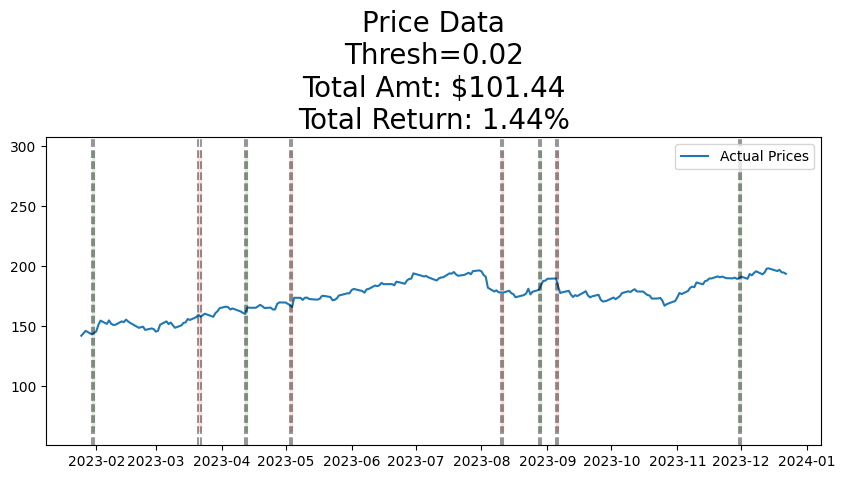

101.43926440466994

In [162]:
def run_simulation_lstm(returns, prices, amt, tickers, look_back, num_prediction, thresh, verbose=False, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt

    data = download_and_prepare_data(tickers, returns.index[0].strftime('%Y-%m-%d'), returns.index[-1].strftime('%Y-%m-%d'))
    models = create_models(data, look_back)
    predictions = predict_for_stocks(models, num_prediction, tickers)
    prediction_dates = predict_dates(num_prediction, returns.index[-1])

    plt.figure(figsize=(10, 4))
    plt.plot(prices[look_back:], label='Actual Prices')

    for date, r in tqdm(returns.iloc[look_back:].items(), total=len(returns.iloc[look_back:])):
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding = False
            ret = (sell_price - buy_price) / buy_price
            amt *= (1 + ret)
            events_list.append(('s', date, ret))

            if verbose:
                print('Sold at $%s' % sell_price)
                print('Actual Return: %s' % (round(ret, 4)))
                print('=======================================')
            continue

        curr_data = returns[:date]

        ticker = tickers[0]
        pred = predictions[ticker][0]

        if not curr_holding and ((type(thresh) == float and np.random.random() < thresh) or
                                  (type(thresh) == tuple and pred > thresh) or
                                  (thresh == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s' % buy_price)

    if verbose:
        print('Total Amount: $%s' % round(amt, 2))

    for idx, event in enumerate(events_list):
        plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
        if event[0] == 's':
            color = 'green' if event[2] > 0 else 'red'
            plt.fill_betweenx(range(int(prices.min() * 0.5), int(prices.max() * 1.5)),
                              event[1], events_list[idx-1][1], color=color, alpha=0.1)

    tot_return = round(100 * (amt / init_amt - 1), 2)
    tot_return = str(tot_return) + '%'
    plt.title("Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s" % (thresh, round(amt, 2), tot_return), fontsize=20)
    plt.legend()
    plt.show()

    return amt

# Example usage
tickers = ['aapl']
start_date = "2023-01-01"
end_date = "2023-12-25"
look_back = 15
num_prediction = 1
thresh = 0.02

returns = yf.download(tickers[0], start=start_date, end=end_date)['Close'].pct_change(1).dropna()
prices = yf.download(tickers[0], start=start_date, end=end_date)['Close']

run_simulation_lstm(returns, prices, amt=100, tickers=tickers, look_back=look_back, num_prediction=num_prediction, thresh=thresh)

google

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/25


<ipython-input-161-e2dd221163e4>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=25, verbose=1)


9/9 [==============================] - 2s 15ms/step - loss: 3.8451e-04
Epoch 2/25
9/9 [==============================] - 0s 15ms/step - loss: 3.7755e-04
Epoch 3/25
9/9 [==============================] - 0s 12ms/step - loss: 3.6986e-04
Epoch 4/25
9/9 [==============================] - 0s 12ms/step - loss: 3.6943e-04
Epoch 5/25
9/9 [==============================] - 0s 12ms/step - loss: 3.6871e-04
Epoch 6/25
9/9 [==============================] - 0s 12ms/step - loss: 3.7139e-04
Epoch 7/25
9/9 [==============================] - 0s 12ms/step - loss: 3.6719e-04
Epoch 8/25
9/9 [==============================] - 0s 13ms/step - loss: 3.7012e-04
Epoch 9/25
9/9 [==============================] - 0s 14ms/step - loss: 3.6725e-04
Epoch 10/25
9/9 [==============================] - 0s 16ms/step - loss: 3.6830e-04
Epoch 11/25
9/9 [==============================] - 0s 9ms/step - loss: 3.7183e-04
Epoch 12/25
9/9 [==============================] - 0s 9ms/step - loss: 3.6981e-04
Epoch 13/25
9/9 [=========

100%|██████████| 230/230 [00:00<00:00, 10057.23it/s]


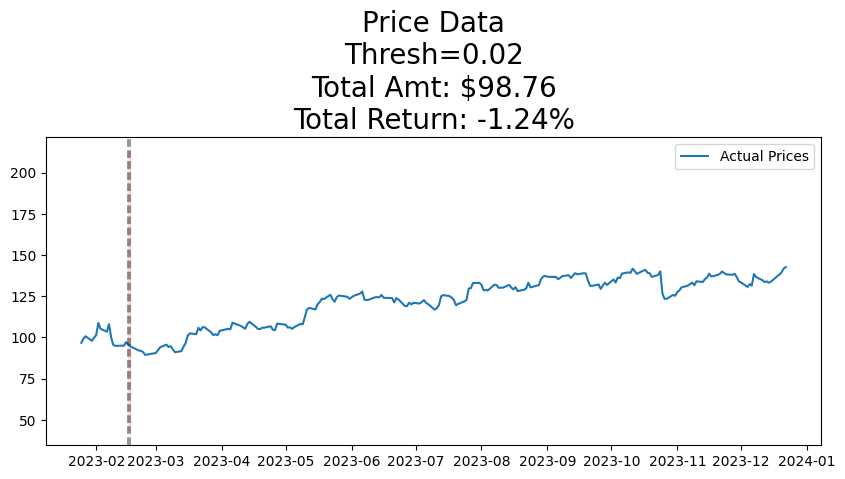

98.75756686513607

In [163]:
def run_simulation_lstm(returns, prices, amt, tickers, look_back, num_prediction, thresh, verbose=False, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt

    data = download_and_prepare_data(tickers, returns.index[0].strftime('%Y-%m-%d'), returns.index[-1].strftime('%Y-%m-%d'))
    models = create_models(data, look_back)
    predictions = predict_for_stocks(models, num_prediction, tickers)
    prediction_dates = predict_dates(num_prediction, returns.index[-1])

    plt.figure(figsize=(10, 4))
    plt.plot(prices[look_back:], label='Actual Prices')

    for date, r in tqdm(returns.iloc[look_back:].items(), total=len(returns.iloc[look_back:])):
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding = False
            ret = (sell_price - buy_price) / buy_price
            amt *= (1 + ret)
            events_list.append(('s', date, ret))

            if verbose:
                print('Sold at $%s' % sell_price)
                print('Actual Return: %s' % (round(ret, 4)))
                print('=======================================')
            continue

        curr_data = returns[:date]

        ticker = tickers[0]
        pred = predictions[ticker][0]

        if not curr_holding and ((type(thresh) == float and np.random.random() < thresh) or
                                  (type(thresh) == tuple and pred > thresh) or
                                  (thresh == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s' % buy_price)

    if verbose:
        print('Total Amount: $%s' % round(amt, 2))

    for idx, event in enumerate(events_list):
        plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
        if event[0] == 's':
            color = 'green' if event[2] > 0 else 'red'
            plt.fill_betweenx(range(int(prices.min() * 0.5), int(prices.max() * 1.5)),
                              event[1], events_list[idx-1][1], color=color, alpha=0.1)

    tot_return = round(100 * (amt / init_amt - 1), 2)
    tot_return = str(tot_return) + '%'
    plt.title("Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s" % (thresh, round(amt, 2), tot_return), fontsize=20)
    plt.legend()
    plt.show()

    return amt

# Example usage
tickers = ['goog']
start_date = "2023-01-01"
end_date = "2023-12-25"
look_back = 15
num_prediction = 1
thresh = 0.02

returns = yf.download(tickers[0], start=start_date, end=end_date)['Close'].pct_change(1).dropna()
prices = yf.download(tickers[0], start=start_date, end=end_date)['Close']

run_simulation_lstm(returns, prices, amt=100, tickers=tickers, look_back=look_back, num_prediction=num_prediction, thresh=thresh)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/25


<ipython-input-154-db397853ec24>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=25, verbose=1)


9/9 [==============================] - 2s 8ms/step - loss: 2.6899e-04
Epoch 2/25
9/9 [==============================] - 0s 8ms/step - loss: 2.6118e-04
Epoch 3/25
9/9 [==============================] - 0s 8ms/step - loss: 2.6073e-04
Epoch 4/25
9/9 [==============================] - 0s 9ms/step - loss: 2.6304e-04
Epoch 5/25
9/9 [==============================] - 0s 8ms/step - loss: 2.5981e-04
Epoch 6/25
9/9 [==============================] - 0s 9ms/step - loss: 2.6139e-04
Epoch 7/25
9/9 [==============================] - 0s 8ms/step - loss: 2.5992e-04
Epoch 8/25
9/9 [==============================] - 0s 9ms/step - loss: 2.5992e-04
Epoch 9/25
9/9 [==============================] - 0s 9ms/step - loss: 2.5991e-04
Epoch 10/25
9/9 [==============================] - 0s 8ms/step - loss: 2.6081e-04
Epoch 11/25
9/9 [==============================] - 0s 8ms/step - loss: 2.5937e-04
Epoch 12/25
9/9 [==============================] - 0s 9ms/step - loss: 2.6014e-04
Epoch 13/25
9/9 [===================

100%|██████████| 230/230 [00:00<00:00, 8369.76it/s]


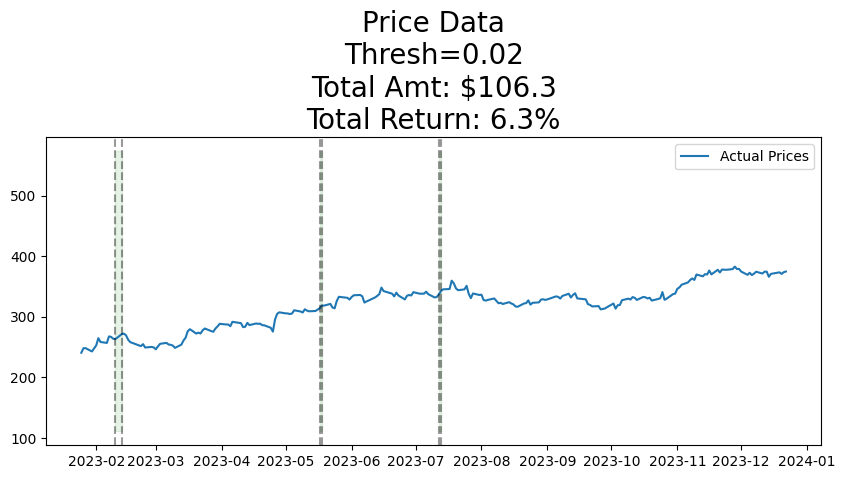

106.30258840681036

In [160]:
def run_simulation_lstm(returns, prices, amt, tickers, look_back, num_prediction, thresh, verbose=False, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt

    data = download_and_prepare_data(tickers, returns.index[0].strftime('%Y-%m-%d'), returns.index[-1].strftime('%Y-%m-%d'))
    models = create_models(data, look_back)
    predictions = predict_for_stocks(models, num_prediction, tickers)
    prediction_dates = predict_dates(num_prediction, returns.index[-1])

    plt.figure(figsize=(10, 4))
    plt.plot(prices[look_back:], label='Actual Prices')

    for date, r in tqdm(returns.iloc[look_back:].items(), total=len(returns.iloc[look_back:])):
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding = False
            ret = (sell_price - buy_price) / buy_price
            amt *= (1 + ret)
            events_list.append(('s', date, ret))

            if verbose:
                print('Sold at $%s' % sell_price)
                print('Actual Return: %s' % (round(ret, 4)))
                print('=======================================')
            continue

        curr_data = returns[:date]

        ticker = tickers[0]
        pred = predictions[ticker][0]

        if not curr_holding and ((type(thresh) == float and np.random.random() < thresh) or
                                  (type(thresh) == tuple and pred > thresh) or
                                  (thresh == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s' % buy_price)

    if verbose:
        print('Total Amount: $%s' % round(amt, 2))

    for idx, event in enumerate(events_list):
        plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
        if event[0] == 's':
            color = 'green' if event[2] > 0 else 'red'
            plt.fill_betweenx(range(int(prices.min() * 0.5), int(prices.max() * 1.5)),
                              event[1], events_list[idx-1][1], color=color, alpha=0.1)

    tot_return = round(100 * (amt / init_amt - 1), 2)
    tot_return = str(tot_return) + '%'
    plt.title("Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s" % (thresh, round(amt, 2), tot_return), fontsize=20)
    plt.legend()
    plt.show()

    return amt

# Example usage
tickers = ['msft']
start_date = "2023-01-01"
end_date = "2023-12-25"
look_back = 15
num_prediction = 1
thresh = 0.02

returns = yf.download(tickers[0], start=start_date, end=end_date)['Close'].pct_change(1).dropna()
prices = yf.download(tickers[0], start=start_date, end=end_date)['Close']

run_simulation_lstm(returns, prices, amt=100, tickers=tickers, look_back=look_back, num_prediction=num_prediction, thresh=thresh)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/25


<ipython-input-161-e2dd221163e4>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=25, verbose=1)


9/9 [==============================] - 2s 9ms/step - loss: 0.0011
Epoch 2/25
9/9 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 3/25
9/9 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 4/25
9/9 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 5/25
9/9 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 6/25
9/9 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 7/25
9/9 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 8/25
9/9 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 9/25
9/9 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 10/25
9/9 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 11/25
9/9 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 12/25
9/9 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 13/25
9/9 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch

100%|██████████| 230/230 [00:00<00:00, 10187.66it/s]


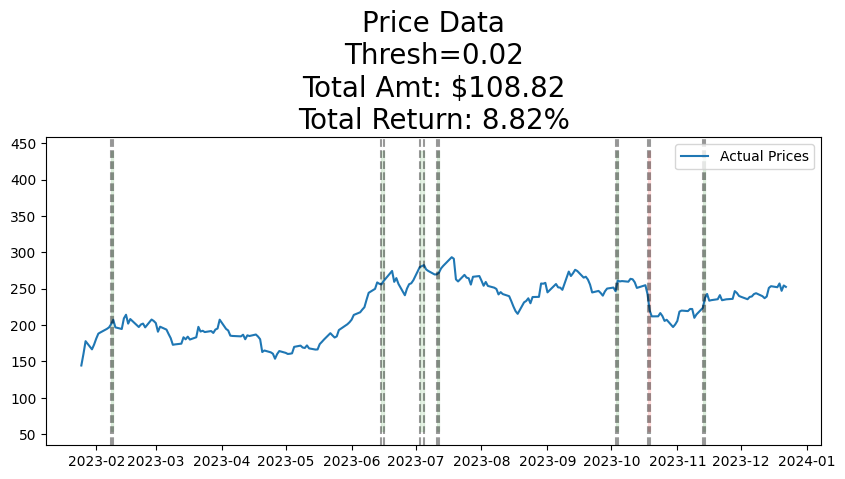

108.82169676302081

In [164]:
def run_simulation_lstm(returns, prices, amt, tickers, look_back, num_prediction, thresh, verbose=False, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt

    data = download_and_prepare_data(tickers, returns.index[0].strftime('%Y-%m-%d'), returns.index[-1].strftime('%Y-%m-%d'))
    models = create_models(data, look_back)
    predictions = predict_for_stocks(models, num_prediction, tickers)
    prediction_dates = predict_dates(num_prediction, returns.index[-1])

    plt.figure(figsize=(10, 4))
    plt.plot(prices[look_back:], label='Actual Prices')

    for date, r in tqdm(returns.iloc[look_back:].items(), total=len(returns.iloc[look_back:])):
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding = False
            ret = (sell_price - buy_price) / buy_price
            amt *= (1 + ret)
            events_list.append(('s', date, ret))

            if verbose:
                print('Sold at $%s' % sell_price)
                print('Actual Return: %s' % (round(ret, 4)))
                print('=======================================')
            continue

        curr_data = returns[:date]

        ticker = tickers[0]
        pred = predictions[ticker][0]

        if not curr_holding and ((type(thresh) == float and np.random.random() < thresh) or
                                  (type(thresh) == tuple and pred > thresh) or
                                  (thresh == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s' % buy_price)

    if verbose:
        print('Total Amount: $%s' % round(amt, 2))

    for idx, event in enumerate(events_list):
        plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
        if event[0] == 's':
            color = 'green' if event[2] > 0 else 'red'
            plt.fill_betweenx(range(int(prices.min() * 0.5), int(prices.max() * 1.5)),
                              event[1], events_list[idx-1][1], color=color, alpha=0.1)

    tot_return = round(100 * (amt / init_amt - 1), 2)
    tot_return = str(tot_return) + '%'
    plt.title("Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s" % (thresh, round(amt, 2), tot_return), fontsize=20)
    plt.legend()
    plt.show()

    return amt

# Example usage
tickers = ['tsla']
start_date = "2023-01-01"
end_date = "2023-12-25"
look_back = 15
num_prediction = 1
thresh = 0.02

returns = yf.download(tickers[0], start=start_date, end=end_date)['Close'].pct_change(1).dropna()
prices = yf.download(tickers[0], start=start_date, end=end_date)['Close']

run_simulation_lstm(returns, prices, amt=100, tickers=tickers, look_back=look_back, num_prediction=num_prediction, thresh=thresh)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/25


<ipython-input-161-e2dd221163e4>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=25, verbose=1)


9/9 [==============================] - 2s 8ms/step - loss: 9.1143e-04
Epoch 2/25
9/9 [==============================] - 0s 9ms/step - loss: 8.9368e-04
Epoch 3/25
9/9 [==============================] - 0s 8ms/step - loss: 8.8760e-04
Epoch 4/25
9/9 [==============================] - 0s 9ms/step - loss: 8.8596e-04
Epoch 5/25
9/9 [==============================] - 0s 9ms/step - loss: 8.8113e-04
Epoch 6/25
9/9 [==============================] - 0s 9ms/step - loss: 8.8724e-04
Epoch 7/25
9/9 [==============================] - 0s 9ms/step - loss: 8.7833e-04
Epoch 8/25
9/9 [==============================] - 0s 9ms/step - loss: 8.7843e-04
Epoch 9/25
9/9 [==============================] - 0s 8ms/step - loss: 8.7855e-04
Epoch 10/25
9/9 [==============================] - 0s 9ms/step - loss: 8.7883e-04
Epoch 11/25
9/9 [==============================] - 0s 9ms/step - loss: 8.7830e-04
Epoch 12/25
9/9 [==============================] - 0s 14ms/step - loss: 8.7754e-04
Epoch 13/25
9/9 [==================

100%|██████████| 230/230 [00:00<00:00, 10742.89it/s]


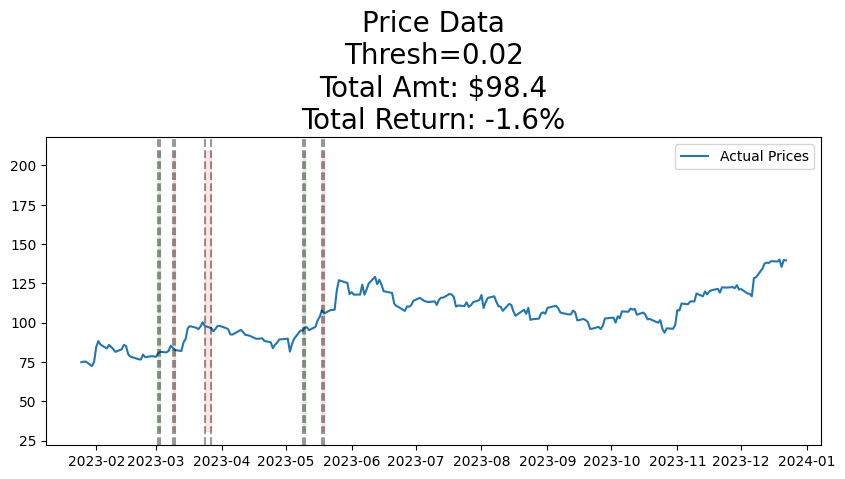

98.40390679038441

In [165]:
def run_simulation_lstm(returns, prices, amt, tickers, look_back, num_prediction, thresh, verbose=False, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt

    data = download_and_prepare_data(tickers, returns.index[0].strftime('%Y-%m-%d'), returns.index[-1].strftime('%Y-%m-%d'))
    models = create_models(data, look_back)
    predictions = predict_for_stocks(models, num_prediction, tickers)
    prediction_dates = predict_dates(num_prediction, returns.index[-1])

    plt.figure(figsize=(10, 4))
    plt.plot(prices[look_back:], label='Actual Prices')

    for date, r in tqdm(returns.iloc[look_back:].items(), total=len(returns.iloc[look_back:])):
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding = False
            ret = (sell_price - buy_price) / buy_price
            amt *= (1 + ret)
            events_list.append(('s', date, ret))

            if verbose:
                print('Sold at $%s' % sell_price)
                print('Actual Return: %s' % (round(ret, 4)))
                print('=======================================')
            continue

        curr_data = returns[:date]

        ticker = tickers[0]
        pred = predictions[ticker][0]

        if not curr_holding and ((type(thresh) == float and np.random.random() < thresh) or
                                  (type(thresh) == tuple and pred > thresh) or
                                  (thresh == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s' % buy_price)

    if verbose:
        print('Total Amount: $%s' % round(amt, 2))

    for idx, event in enumerate(events_list):
        plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
        if event[0] == 's':
            color = 'green' if event[2] > 0 else 'red'
            plt.fill_betweenx(range(int(prices.min() * 0.5), int(prices.max() * 1.5)),
                              event[1], events_list[idx-1][1], color=color, alpha=0.1)

    tot_return = round(100 * (amt / init_amt - 1), 2)
    tot_return = str(tot_return) + '%'
    plt.title("Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s" % (thresh, round(amt, 2), tot_return), fontsize=20)
    plt.legend()
    plt.show()

    return amt

# Example usage
tickers = ['amd']
start_date = "2023-01-01"
end_date = "2023-12-25"
look_back = 15
num_prediction = 1
thresh = 0.02

returns = yf.download(tickers[0], start=start_date, end=end_date)['Close'].pct_change(1).dropna()
prices = yf.download(tickers[0], start=start_date, end=end_date)['Close']

run_simulation_lstm(returns, prices, amt=100, tickers=tickers, look_back=look_back, num_prediction=num_prediction, thresh=thresh)